In [54]:
import pandas as pd
import ast

In [55]:
max_min = 1669.6895
min = 85.19250000000002

In [56]:
scale_list = ['train_predict','train_label','validation_predict','validation_label']
all_list = ['train_loss','test_loss'] + scale_list

In [76]:
model_name = 'RRNN'

In [78]:
qRNN_cls = pd.read_csv(f'./result_data/cRNN_fixed_data.csv')
qRNN_cls = qRNN_cls.applymap(lambda x: 0 if pd.isna(x) else x)
qRNN_KAN = pd.read_csv(f'./result_data/{model_name}_KAN_data.csv')
qRNN_KAN = qRNN_KAN.applymap(lambda x: 0 if pd.isna(x) else x)
#qRNN_QNE = pd.read_csv(f'./result_data/{model_name}_NQE(KAN)_cor_data.csv')
#qRNN_QNE = qRNN_QNE.applymap(lambda x: 0 if pd.isna(x) else x)
qRNN_fixed = pd.read_csv(f'./result_data/{model_name}_fixed_data.csv')
qRNN_fixed = qRNN_fixed.applymap(lambda x: 0 if pd.isna(x) else x)

C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\2436555980.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_cls = qRNN_cls.applymap(lambda x: 0 if pd.isna(x) else x)
C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\2436555980.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_KAN = qRNN_KAN.applymap(lambda x: 0 if pd.isna(x) else x)
C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\2436555980.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_fixed = qRNN_fixed.applymap(lambda x: 0 if pd.isna(x) else x)


In [79]:
import numpy as np
def get_data(model,train_loader,test_loader):
    pred_list = []
    train_label_list = []
    test_pred_list = []
    test_label_list = []
    for data,label in train_loader:
        pred = model(data)
        pred_list.append(pred.detach().numpy())
        train_label_list.append(label.numpy())
    for data,label in test_loader:
        pred = model(data)
        test_pred_list.append(pred.detach().numpy())
        test_label_list.append(label.numpy())

    return list(np.concatenate(pred_list).reshape(-1)),list(np.concatenate(train_label_list).reshape(-1)),list(np.concatenate(test_pred_list).reshape(-1)),list(np.concatenate(test_label_list).reshape(-1))

In [80]:
def decoding(data,cor=False):
    result_data = pd.DataFrame(data)
    print(data[scale_list])
    if cor:
        result_data[scale_list] = data[scale_list]*max_min+min
        return result_data
            
    else:
        result_data[scale_list] = data[scale_list]*max_min/6.28+min
        return result_data

In [81]:
import matplotlib.pyplot as plt
scaled_data_KAN = decoding(qRNN_KAN)
scaled_data_QNE = decoding(qRNN_QNE,True)
scaled_data_fixed = decoding(qRNN_fixed)
scaled_data_cls = decoding(qRNN_cls)
scaled_data_KAN.to_csv(f'./result_decoding/{model_name}_KAN_data.csv')
scaled_data_QNE.to_csv(f'./result_decoding/{model_name}_QNE_cor_data.csv')
scaled_data_fixed.to_csv(f'./result_decoding/{model_name}_fixed_data.csv')

     train_predict  train_label  validation_predict  validation_label
0         3.737779     3.358386            3.769579          3.811014
1         3.380239     2.670323            4.367316          4.334215
2         3.354449     3.083696            4.378473          4.790879
3         3.137887     3.227797            4.339983          5.179062
4         3.284511     2.883941            3.402295          2.822020
..             ...          ...                 ...               ...
395       3.118145     3.094813            0.000000          0.000000
396       4.319196     3.995999            0.000000          0.000000
397       3.542492     4.026239            0.000000          0.000000
398       3.061872     3.044125            0.000000          0.000000
399       4.693035     5.014934            0.000000          0.000000

[400 rows x 4 columns]
     train_predict  train_label  validation_predict  validation_label
0         0.518920     0.606849            0.518920          0.606

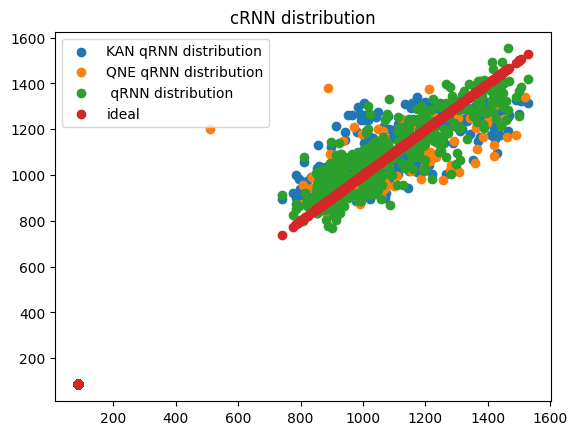

In [82]:
plt.title('cRNN distribution')
plt.scatter(scaled_data_KAN['train_label'],scaled_data_KAN['train_predict'],label='KAN qRNN distribution')
plt.scatter(scaled_data_QNE['train_label'],scaled_data_QNE['train_predict'],label='QNE qRNN distribution')
plt.scatter(scaled_data_fixed['train_label'],scaled_data_fixed['train_predict'],label=' qRNN distribution')
plt.scatter(scaled_data_fixed['train_label'],scaled_data_fixed['train_label'],label='ideal')
plt.legend()

In [83]:
from sklearn.metrics import mean_squared_error
KAN_MSE = mean_squared_error(scaled_data_KAN['validation_label'],scaled_data_KAN['validation_predict'])
QNE_MSE = mean_squared_error(scaled_data_QNE['validation_label'],scaled_data_QNE['validation_predict'])
fixed_MSE = mean_squared_error(scaled_data_fixed['validation_label'],scaled_data_fixed['validation_predict'])
cls_MSE = mean_squared_error(scaled_data_cls['validation_label'],scaled_data_cls['validation_predict'])

|Method|qGRU|qRNN|RRNN|
|---|---|---|---|
|Fixed|10819|7604|9814
|KAN|10683|5166|6246
|QNE|**5240**|**4974**|None|

